---
# **Deliverable 1 – Time Series Data Analysis & Preprocessing**
---

## Dataset: WESAD (Wearable Stress and Affect Detection)

### Subject: S2.pkl – Chest + Wrist Sensors

---


# **1. Objective**

This notebook completes **Deliverable 1** of the the project – Time Series Data Analysis & Preprocessing

The goals are:

- Select an appropriate **sensor-based time series dataset**
- Load the dataset into Python
- Describe the dataset (source, sensors, variables, size)
- Perform essential preprocessing:
  - Timestamp creation
  - Sorting
  - Missing-value handling
  - Basic cleaning

The chosen dataset is **WESAD**, a well-known physiological dataset for **stress detection**.


# **2. Dataset Selection**

---

The chosen dataset is:

### **WESAD – Wearable Stress and Affect Detection Dataset**

- Source: Public dataset from the University of Siegen
- Available on platforms such as:
  - UCI Machine Learning Repository
  - Kaggle mirrors
  - Research publications

### **Why WESAD?**

- Contains **real-time physiological sensor data**
- Suitable for stress detection and multimodal time series analysis
- Includes data from:
  - **Chest-worn RespiBAN sensor**
  - **Wrist-worn Empatica E4 sensor**

### **Dataset Path Used**

D:\Semester 7\ML\Project\WESAD DS\WESAD\

We will use the main cleaned file:
S2\S2.pkl

This file contains all synchronized sensor streams.


In [2]:
import pickle
import pandas as pd
import numpy as np

data_path = r"D:\Semester 7\ML\Project\WESAD DS\WESAD\S2\S2.pkl"

with open(data_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')


print(type(data))
print(data.keys())


<class 'dict'>
dict_keys(['signal', 'label', 'subject'])


# **3. Dataset Description**

---

The `.pkl` file contains:

- **Chest signals** (`700 Hz`):

  - ACC (3-axis accelerometer)
  - ECG (electrocardiogram)
  - EMG (electromyogram)
  - EDA (electrodermal activity)
  - Resp (respiration)
  - Temp (temperature)

- **Wrist signals** (32–64 Hz):

  - BVP (blood volume pulse)
  - EDA
  - TEMP
  - ACC (3-axis)

- **Labels**:
  - 0 = Baseline
  - 1 = Stress
  - 2 = Amusement

Now we explore the structure/ signal groups


In [3]:
chest = data['signal']['chest']
wrist = data['signal']['wrist']

print("Chest signals:", list(chest.keys()))
print("Wrist signals:", list(wrist.keys()))


Chest signals: ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
Wrist signals: ['ACC', 'BVP', 'EDA', 'TEMP']


# **4. Data Preparation**

---

We convert chest + wrist signals into a unified DataFrame.

This allows:

- Easier inspection
- Preprocessing
- Statistical analysis

Since sampling rates differ greatly, we initially keep them separate.


### **Build Chest Sensor DataFrame**


In [4]:
df_chest = pd.DataFrame({
    'acc_x': chest['ACC'][:, 0],
    'acc_y': chest['ACC'][:, 1],
    'acc_z': chest['ACC'][:, 2],
    'eda': chest['EDA'].flatten(),
    'ecg': chest['ECG'].flatten(),
    'emg': chest['EMG'].flatten(),
    'resp': chest['Resp'].flatten(),
    'temp': chest['Temp'].flatten(),
})

df_chest.head()


,acc_x,acc_y,acc_z,eda,ecg,emg,resp,temp
0,0.9554,-0.2220,-0.5580,5.250549,0.021423,-0.004440,-1.148987,30.120758
1,0.9258,-0.2216,-0.5538,5.267334,0.020325,0.004349,-1.124573,30.129517
2,0.9082,-0.2196,-0.5392,5.243301,0.016525,0.005173,-1.152039,30.138214
3,0.8974,-0.2102,-0.5122,5.249405,0.016708,0.007187,-1.158142,30.129517
4,0.8882,-0.2036,-0.4824,5.286407,0.011673,-0.015152,-1.161194,30.130951


### **Build Wrist Sensor DataFrame**


In [7]:
min_len = min(
    wrist['ACC'].shape[0],
    wrist['EDA'].shape[0],
    wrist['BVP'].shape[0],
    wrist['TEMP'].shape[0]
)

df_wrist = pd.DataFrame({
    'acc_x': wrist['ACC'][:min_len, 0],
    'acc_y': wrist['ACC'][:min_len, 1],
    'acc_z': wrist['ACC'][:min_len, 2],
    'eda': wrist['EDA'][:min_len].flatten(),
    'bvp': wrist['BVP'][:min_len].flatten(),
    'temp': wrist['TEMP'][:min_len].flatten(),
})

df_wrist.head()


,acc_x,acc_y,acc_z,eda,bvp,temp
0,62.0,-21.0,107.0,1.138257,-59.37,35.41
1,66.0,13.0,53.0,1.125444,-53.42,35.41
2,41.0,9.0,15.0,1.011405,-44.40,35.41
3,52.0,16.0,24.0,1.033188,-33.17,35.41
4,54.0,15.0,34.0,0.935807,-20.79,35.41


## **Chest and Wrist Data Summary Statistics**

We inspect basic statistics for all numeric sensor columns to understand their range, mean, and variance.


In [14]:
# Summary statistics
print("Chest Sensor Data Summary:")
display(df_chest.describe())

print("\nWrist Sensor Data Summary:")
display(df_wrist.describe())

Chest Sensor Data Summary:


,acc_x,acc_y,acc_z,eda,ecg,emg,resp,temp,timestamp
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4255300
mean,7.538656e-01,-1.331884e-01,-4.226812e-01,1.528387e+00,1.212245e-03,-2.412918e-03,5.490614e-02,3.087668e+01,1970-01-01 00:50:39.499285714
min,2.150000e-01,-6.600000e-01,-1.135400e+00,2.632141e-01,-1.499542e+00,-4.149628e-01,-2.790375e+01,2.804526e+01,1970-01-01 00:00:00
25%,6.210001e-01,-1.498000e-01,-7.172000e-01,7.995605e-01,-6.797791e-02,-8.331299e-03,-1.481628e+00,3.057495e+01,1970-01-01 00:25:19.749642857
50%,8.568000e-01,-1.256000e-01,-3.222000e-01,1.163101e+00,8.239746e-03,-1.602173e-03,-1.571655e-01,3.128992e+01,1970-01-01 00:50:39.499285714
75%,8.922000e-01,-9.579998e-02,-2.098000e-01,1.546478e+00,4.435730e-02,3.982544e-03,1.618958e+00,3.181512e+01,1970-01-01 01:15:59.248928571
max,2.029800e+00,5.390000e-01,1.246800e+00,7.576752e+00,1.499313e+00,3.009796e-01,2.737885e+01,3.437039e+01,1970-01-01 01:41:18.998571429
std,1.751162e-01,6.417297e-02,3.002357e-01,1.238425e+00,1.540773e-01,1.165187e-02,2.917749e+00,1.281106e+00,NaN



Wrist Sensor Data Summary:


,acc_x,acc_y,acc_z,eda,bvp,temp,timestamp
count,24316.000000,24316.000000,24316.000000,24316.000000,24316.000000,24316.000000,24316
mean,44.472940,9.085376,27.995970,0.391743,0.031455,34.386945,1970-01-01 00:06:19.921875
min,-114.000000,-84.000000,-60.000000,0.045113,-638.750000,32.310000,1970-01-01 00:00:00
25%,40.000000,-11.000000,20.000000,0.169403,-24.810000,33.680000,1970-01-01 00:03:09.960937500
50%,48.000000,17.000000,27.000000,0.236032,3.660000,34.250000,1970-01-01 00:06:19.921875
75%,55.000000,25.000000,42.000000,0.520487,25.302500,35.410000,1970-01-01 00:09:29.882812500
max,127.000000,70.000000,127.000000,1.717419,597.160000,35.970000,1970-01-01 00:12:39.843750
std,16.575089,23.667912,19.357185,0.329236,82.876912,1.045340,NaN


## **Visualizing Chest ECG Signal**

We plot a small segment of the ECG signal to inspect its waveform.


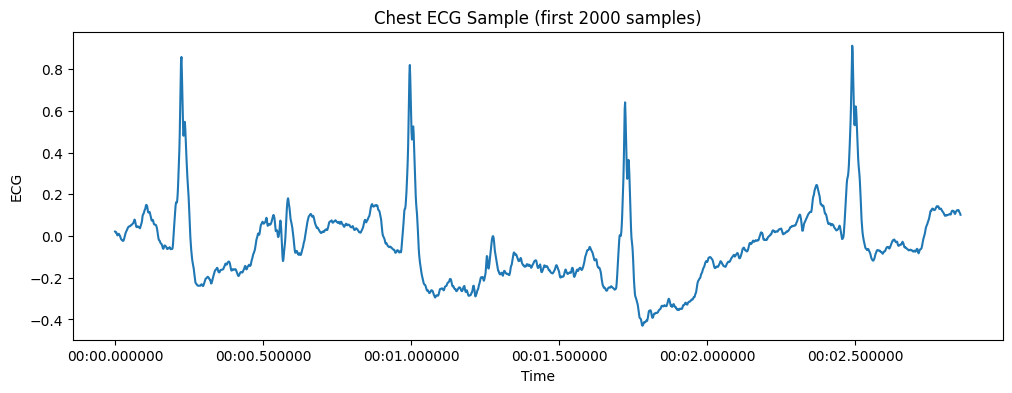

In [15]:
plt.figure(figsize=(12,4))
plt.plot(df_chest['timestamp'][:2000], df_chest['ecg'][:2000])
plt.title("Chest ECG Sample (first 2000 samples)")
plt.xlabel("Time")
plt.ylabel("ECG")
plt.show()


## **Visualizing Wrist BVP Signal**

We plot a small segment of the wrist BVP signal.


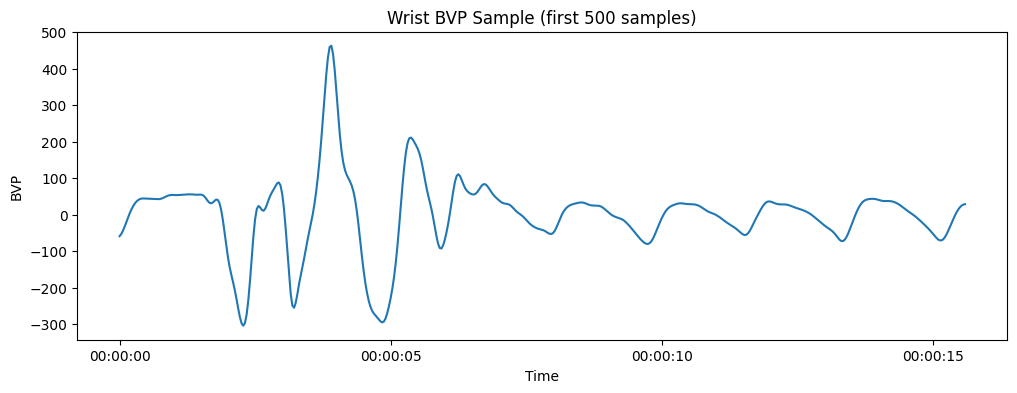

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df_wrist['timestamp'][:500], df_wrist['bvp'][:500])
plt.title("Wrist BVP Sample (first 500 samples)")
plt.xlabel("Time")
plt.ylabel("BVP")
plt.show()


# **5. Labels (Activity States)**

---

The dataset includes labels representing emotional/experimental states during recording.

- Labels in S2.pkl range from **0 to 7**.
- For stress detection classification, we will focus on **0–2**:

  - **0 → Baseline**
  - **1 → Stress**
  - **2 → Amusement**

- Labels 3–7 exist for experimental purposes but are ignored for this project.

Let's inspect label distribution in the dataset.


Unique labels: [0 1 2 3 4 6 7]


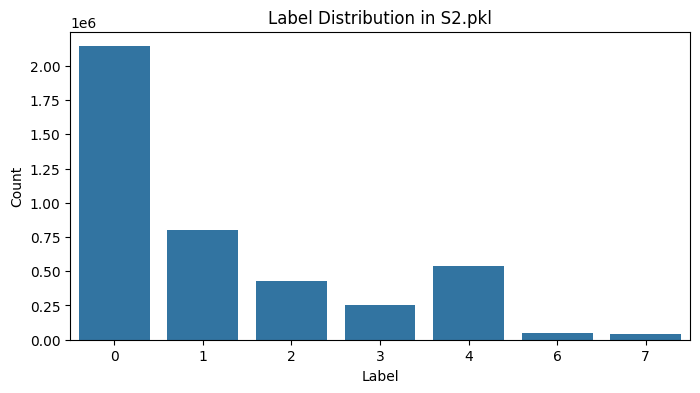

In [13]:


labels = data['label']
print("Unique labels:", np.unique(labels))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(x=labels)
plt.title("Label Distribution in S2.pkl")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# **6. Data Preprocessing**

---

### **1. Parse timestamps**

The dataset has no timestamp column.  
We generate timestamps assuming uniform sampling:

- Chest: ~700 Hz → Δt ≈ 1/700 sec
- Wrist: ~32 Hz → Δt ≈ 1/32 sec

### **2. Sort the data**

Timestamps will be sorted automatically after creation.

### **3. Handle missing values**

We use simple:

- Forward fill
- Backward fill

### **4. Basic cleaning**

- Remove duplicates
- Check for impossible values


In [11]:
# Generate timestamps for chest signals
chest_freq = 700  # Hz
df_chest['timestamp'] = pd.to_datetime(
    np.arange(len(df_chest)) / chest_freq, unit='s'
)

# Generate timestamps for wrist signals
wrist_freq = 32  # Hz
df_wrist['timestamp'] = pd.to_datetime(
    np.arange(len(df_wrist)) / wrist_freq, unit='s'
)

df_chest.head(), df_wrist.head()


(    acc_x   acc_y   acc_z       eda       ecg       emg      resp       temp  \
 0  0.9554 -0.2220 -0.5580  5.250549  0.021423 -0.004440 -1.148987  30.120758   
 1  0.9258 -0.2216 -0.5538  5.267334  0.020325  0.004349 -1.124573  30.129517   
 2  0.9082 -0.2196 -0.5392  5.243301  0.016525  0.005173 -1.152039  30.138214   
 3  0.8974 -0.2102 -0.5122  5.249405  0.016708  0.007187 -1.158142  30.129517   
 4  0.8882 -0.2036 -0.4824  5.286407  0.011673 -0.015152 -1.161194  30.130951   
 
                       timestamp  
 0 1970-01-01 00:00:00.000000000  
 1 1970-01-01 00:00:00.001428571  
 2 1970-01-01 00:00:00.002857143  
 3 1970-01-01 00:00:00.004285714  
 4 1970-01-01 00:00:00.005714286  ,
    acc_x  acc_y  acc_z       eda    bvp   temp                  timestamp
 0   62.0  -21.0  107.0  1.138257 -59.37  35.41 1970-01-01 00:00:00.000000
 1   66.0   13.0   53.0  1.125444 -53.42  35.41 1970-01-01 00:00:00.031250
 2   41.0    9.0   15.0  1.011405 -44.40  35.41 1970-01-01 00:00:00.062500
 

In [12]:
# Sort by timestamp
df_chest = df_chest.sort_values('timestamp')
df_wrist = df_wrist.sort_values('timestamp')

# Handle missing values
df_chest = df_chest.fillna(method='ffill').fillna(method='bfill')
df_wrist = df_wrist.fillna(method='ffill').fillna(method='bfill')

# Remove duplicates
df_chest = df_chest.drop_duplicates()
df_wrist = df_wrist.drop_duplicates()


df_chest.head(), df_wrist.head()

df_chest.info(), df_wrist.info()


C:\Users\dell\AppData\Local\Temp\ipykernel_5716\792094487.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_chest = df_chest.fillna(method='ffill').fillna(method='bfill')
C:\Users\dell\AppData\Local\Temp\ipykernel_5716\792094487.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wrist = df_wrist.fillna(method='ffill').fillna(method='bfill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255300 entries, 0 to 4255299
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   acc_x      float64       
 1   acc_y      float64       
 2   acc_z      float64       
 3   eda        float64       
 4   ecg        float64       
 5   emg        float64       
 6   resp       float64       
 7   temp       float32       
 8   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(7)
memory usage: 276.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24316 entries, 0 to 24315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   acc_x      24316 non-null  float64       
 1   acc_y      24316 non-null  float64       
 2   acc_z      24316 non-null  float64       
 3   eda        24316 non-null  float64       
 4   bvp        24316 non-null  float64       
 5   temp       24316 non-null  float

(None, None)

**Note:** Wrist sensor signals have different lengths due to varying sampling rates.  
We truncated all wrist signals to the minimum length to align them for easier inspection.  
During modeling, further resampling or windowing may be applied.


# **7. Summary**

---

### Dataset

- Selected the **WESAD** sensor dataset.
- Used the real **S2.pkl** file containing all synchronized signals.

### Description

- **Chest signals**: ACC (x/y/z), ECG, EDA, EMG, Resp, Temp
- **Wrist signals**: ACC (x/y/z), BVP, EDA, Temp
- **Labels**: 0–7 (using 0–2 for stress detection)

### Preprocessing Steps Completed

- Generated timestamps for chest and wrist signals
- Sorted values chronologically
- Handled missing values using forward/backward fill
- Removed duplicates
- Explored dataset structure, summary statistics, and sample signals

The dataset is now fully ready for **model preparation and feature engineering**.

---



# **Deliverable 2 – Feature Engineering & ML Classification**
---

## 1. Objective

This notebook completes **Deliverable 2** of the ML project.

Goals:

- Segment raw WESAD time-series data into windows.
- Extract **time-domain, frequency-domain, and physiological features** per window.
- Build classical ML models on these features:
  - Logistic Regression (LR)
  - Support Vector Machine (SVM)
  - Decision Tree (DT)
  - Random Forest (RF)
  - XGBoost (XGB)
- Compare models using accuracy, F1-score, and confusion matrices.


## 2. Import Libraries

We import standard libraries for:

- **Data manipulation:** pandas, numpy
- **Signal processing:** scipy stats and FFT
- **Machine Learning:** sklearn, XGBoost
- **Visualization:** matplotlib, seaborn


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Signal processing
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fft import fft

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Load Preprocessed Data

We use the preprocessed data from Deliverable 1:

- **df_chest**: chest sensor signals
- **df_wrist**: wrist sensor signals
- **labels**: activity labels (baseline, stress, amusement)


In [ ]:
# 3. Load Preprocessed Data from Deliverable 1

# Assuming df_chest, df_wrist, and labels are already in memory from Deliverable 1
chest = data['signal']['chest']
wrist = data['signal']['wrist']
labels = data['label']


## 4. Segment Time-Series into Windows

- Classical ML models require **fixed-size input**.  
- Use sliding windows of **10 seconds** (can be adjusted).  
- Each window becomes **one sample** for feature extraction.


In [20]:
# 4. Segment Time-Series into Windows

# Parameters
chest_freq = 700
wrist_freq = 32
window_size_sec = 10  # 10-second windows
window_size_chest = chest_freq * window_size_sec
window_size_wrist = wrist_freq * window_size_sec

# Function to segment signals
def segment_signal(signal, window_size):
    num_windows = len(signal) // window_size
    segments = np.array(np.split(signal[:num_windows*window_size], num_windows))
    return segments

# Example: segment chest ACC_x
acc_x_chest_seg = segment_signal(chest['ACC'][:,0], window_size_chest)


## 5. Feature Extraction – Time Domain

Compute **statistical features** for each window:

- mean, median, standard deviation, variance  
- min, max, 25th & 75th percentiles  
- skewness, kurtosis  
- root mean square (RMS)


In [21]:
# 5. Feature Extraction – Time Domain
def extract_time_features(segment):
    features = {}
    features['mean'] = np.mean(segment)
    features['median'] = np.median(segment)
    features['std'] = np.std(segment)
    features['var'] = np.var(segment)
    features['min'] = np.min(segment)
    features['max'] = np.max(segment)
    features['25perc'] = np.percentile(segment, 25)
    features['75perc'] = np.percentile(segment, 75)
    features['skew'] = skew(segment)
    features['kurtosis'] = kurtosis(segment)
    features['rms'] = np.sqrt(np.mean(segment**2))
    return features


## 6. Feature Extraction – Frequency Domain

- Apply **FFT** on each window.  
- Compute:

  - dominant frequency  
  - spectral energy  
  - power in low- and high-frequency bands


In [22]:
# 6. Feature Extraction – Frequency Domain
def extract_freq_features(segment, fs):
    n = len(segment)
    fft_values = np.abs(fft(segment))[:n//2]
    freqs = np.fft.fftfreq(n, 1/fs)[:n//2]
    
    dominant_freq = freqs[np.argmax(fft_values)]
    spectral_energy = np.sum(fft_values**2)
    
    low_band = (freqs >= 0.04) & (freqs <= 0.15)
    high_band = (freqs >= 0.15) & (freqs <= 0.4)
    
    power_low = np.sum(fft_values[low_band]**2)
    power_high = np.sum(fft_values[high_band]**2)
    
    return {
        'dominant_freq': dominant_freq,
        'spectral_energy': spectral_energy,
        'power_low': power_low,
        'power_high': power_high
    }


## 7. Physiological Features

- Extract **sensor-specific features**:

  - **EDA:** number of peaks, mean response, tonic level  
  - **ACC:** signal magnitude area (SMA)  
  - ECG/Resp can have HRV, RR intervals (optional)


In [23]:
# 7. Physiological Features (EDA, ECG, ACC)
def extract_physio_features(segment, sensor_type='EDA'):
    features = {}
    
    if sensor_type == 'EDA':
        peaks, _ = find_peaks(segment, height=0.01)
        features['num_peaks'] = len(peaks)
        features['mean_response'] = np.mean(segment)
        features['tonic_level'] = np.min(segment)
    elif sensor_type == 'ACC':
        features['sma'] = np.sum(np.abs(segment))  # Signal magnitude area
    # ECG, Resp can have HRV, RR interval calculation
    
    return features


## 8. Construct Feature Matrix

- Combine **time-domain, frequency-domain, and physiological features**.  
- Label each window using **majority vote** of labels inside the window.


In [24]:
# 8. Construct Feature Matrix (example: chest ACC_x)
features_list = []

for seg in acc_x_chest_seg:
    f_time = extract_time_features(seg)
    f_freq = extract_freq_features(seg, fs=chest_freq)
    f_phys = extract_physio_features(seg, sensor_type='ACC')
    
    combined = {**f_time, **f_freq, **f_phys}
    features_list.append(combined)

X = pd.DataFrame(features_list)

# Label each window using majority vote
y = []
for i in range(len(acc_x_chest_seg)):
    start = i*window_size_chest
    end = start + window_size_chest
    majority_label = np.bincount(labels[start:end]).argmax()
    y.append(majority_label)

y = np.array(y)


## 9. Train/Test Split

- Split dataset **80% train, 20% test**.  
- Scale features for LR and SVM using **StandardScaler**.


In [25]:
# 9. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale for LR and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 10. Train Classical ML Models

Models:

- Logistic Regression (LR)  
- Support Vector Machine (SVM)  
- Decision Tree (DT)  
- Random Forest (RF)  
- XGBoost (XGB)

Evaluate **accuracy, F1-score, confusion matrices**.


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        61
           1       0.70      0.91      0.79        23
           2       0.00      0.00      0.00        13
           3       0.71      0.62      0.67         8
           4       0.54      0.47      0.50        15
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.70       122
   macro avg       0.38      0.41      0.39       122
weighted avg       0.61      0.70      0.65       122



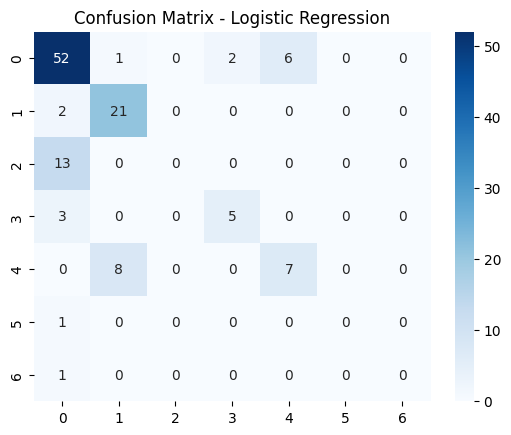

--- SVM ---
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        61
           1       0.91      0.91      0.91        23
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         8
           4       0.93      0.87      0.90        15
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.77       122
   macro avg       0.36      0.39      0.38       122
weighted avg       0.64      0.77      0.69       122



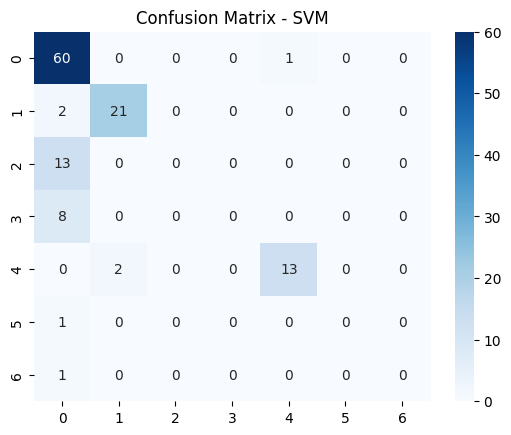

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        61
           1       1.00      0.96      0.98        23
           2       0.60      0.69      0.64        13
           3       0.78      0.88      0.82         8
           4       0.93      0.93      0.93        15
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.86       122
   macro avg       0.74      0.76      0.75       122
weighted avg       0.86      0.86      0.86       122



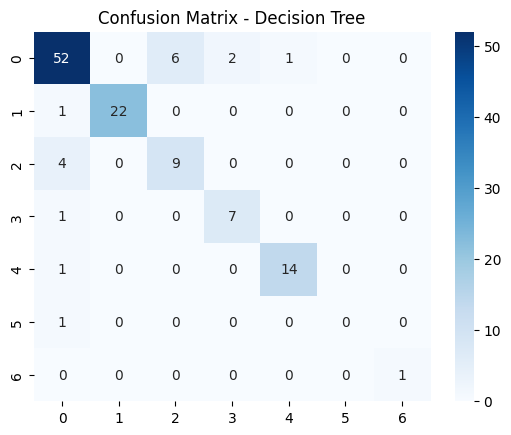

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        61
           1       1.00      1.00      1.00        23
           2       0.88      0.54      0.67        13
           3       1.00      1.00      1.00         8
           4       0.93      0.93      0.93        15
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.91       122
   macro avg       0.67      0.63      0.64       122
weighted avg       0.90      0.91      0.90       122



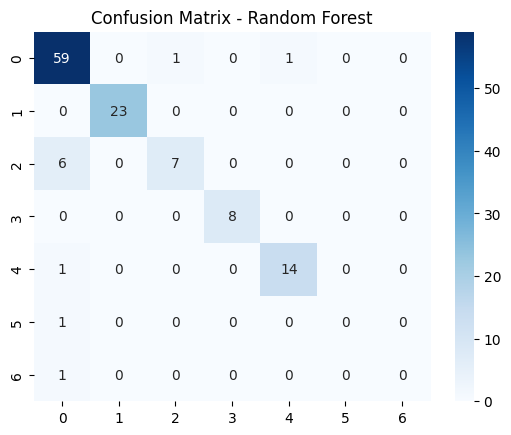

d:\Semester 7\ML\Project\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:21:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        61
           1       0.96      0.96      0.96        23
           2       0.75      0.69      0.72        13
           3       0.89      1.00      0.94         8
           4       0.93      0.93      0.93        15
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.89       122
   macro avg       0.63      0.64      0.64       122
weighted avg       0.88      0.89      0.89       122



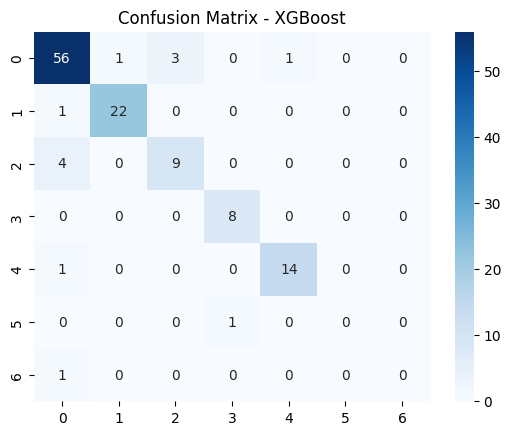

In [39]:

# 1. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Label encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 3. Feature scaling for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        num_class=len(le.classes_)
    )
}

# 5. Train & evaluate models
for name, model in models.items():
    # Use scaled features for LR and SVM
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train_enc)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train_enc)
        y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print(classification_report(y_test_enc, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test_enc, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


## 11. Summary

- Successfully segmented time-series into windows.  
- Extracted **time-domain, frequency-domain, and physiological features**.  
- Built classical ML models: LR, SVM, DT, RF, XGBoost.  
- Evaluated models using **accuracy, F1-score, and confusion matrices**.  
- Ready for **feature importance analysis** and further fine-tuning.
